### 1. LOADING FILES

In [1]:
import pickle 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [3]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score,f1_score,confusion_matrix

In [111]:
lista_modelos=['DTC','RND','BAG','ADA','GBCT','LOGREG','KNN']

In [4]:
train=pd.read_csv('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\data\df_train.csv',sep=',')
test=pd.read_csv('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\data\df_test.csv',sep=',')
X_test=test[['Código Distrito Centro','Age_range_code','Nationality_code','Sex_code','year']]
X_train=train[['Código Distrito Centro','Age_range_code','Nationality_code','Sex_code','year']]
y_test=test['Código Tipo Supuesto Urgente']
y_train=train['Código Tipo Supuesto Urgente']

In [6]:
print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)

(9477, 5)
(28429, 5)
(9477,)
(28429,)


In [101]:
def load_files(file):
    '''
    Cargar modelos con formato binario en un notebook o fichero python
    '''
    os.chdir('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\model')
    model = pickle.load( open( file, "rb" ) )


Aqui vamos a cargar los modelos para pasar los test

In [ ]:
load_files('ADA220905115548.pickle')

In [50]:
load_files('BAG220901161323.pickle','BAG')

In [ ]:
load_files('DTC220831182313.pickle','DTC')

In [40]:
load_files('GBCT220901161340.pickle','GBCT')

In [41]:
load_files('KNN220905121219.pickle','KNN')

In [47]:
load_files('LOGREG220901170800.pickle','LOGREG')

In [ ]:
load_files('RND220901161312.pickle')


In [ ]:
LOGREG

In [5]:
os.chdir('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\model')
ADA = pickle.load( open( 'ADA220905115548.pickle', "rb" ) )

In [6]:
os.chdir('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\model')
BAG = pickle.load( open( 'BAG220901161323.pickle', "rb" ) )

In [19]:
os.chdir('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\model')
DTC = pickle.load( open( 'DTC220831182313.pickle', "rb" ) )

In [21]:
os.chdir('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\model')
GBCT = pickle.load( open( 'GBCT220901161340.pickle', "rb" ) )

In [9]:
GBCT

GradientBoostingClassifier(random_state=20)

In [10]:
os.chdir('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\model')
KNN = pickle.load( open('KNN220905121219.pickle', "rb" ) )

In [11]:
os.chdir('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\model')
LOGREG = pickle.load( open( 'LOGREG220901170800.pickle', "rb" ) )

In [5]:
os.chdir('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\model')
RND = pickle.load( open( 'RND220901161312.pickle', "rb" ) )

In [16]:
RND

RandomForestClassifier(random_state=20)

### 2. CALCULATING ERROR IN EACH MODEL

In [6]:
def error_modelo(model, X_test, y_test):
    '''
    Dejamos grabada cada uno de los parámetros de cada modelo y hacemos su representación
    '''
    y_pred = model.predict(X_test)
    f1_model=f1_score(y_test, y_pred,average='micro')
#    acc_model=accuracy_score(y_test, y_pred)
    precision_model=precision_score(y_test, y_pred,average='micro')
    recall_model=recall_score(y_test, y_pred,average='micro')
#    roc_auc_model=roc_auc_score(y_test, model.predict_proba(X_test),multi_class='ovr')
    conf_model=confusion_matrix(y_test, y_pred, normalize='true')
#    print('Accuracy', acc_model)
    print('F1', f1_model)
    print('Precision', precision_model)
    print('Recall', recall_model)
    print('-'*30)
#    print('ROC', roc_auc_model)

    plt.figure(figsize=(10,10))
    sns.heatmap(conf_model, annot=True)
    return precision_model, recall_model

def errores_modelos(lista_modelos:list): 
    '''
    Usamos una lista de los modelos entrenados para sacar sus metricas juntas y poder hacer asi una evaluación completa de todas
    '''            
    for model in lista_modelos:
        error_modelo(model) 


F1 0.7500263796560094
Precision 0.7500263796560093
Recall 0.7500263796560093
------------------------------


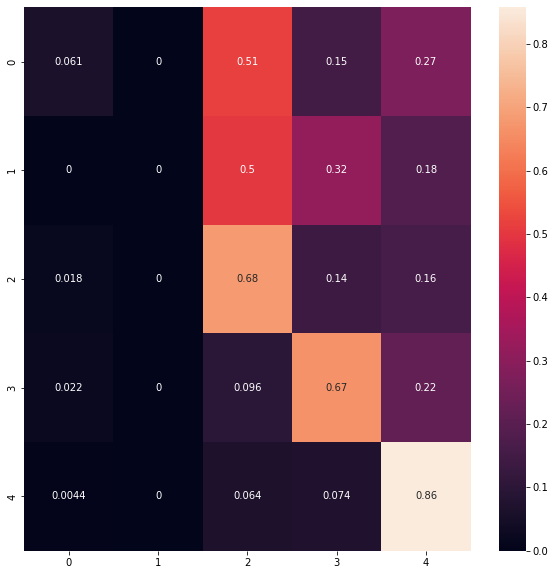

In [16]:
precision_modelo, recall_modelo = error_modelo(ADA, X_test, y_test)                 # De este modo, consigo sacar las variables que he generado dentro de la función

F1 0.7728184024480321
Precision 0.7728184024480321
Recall 0.7728184024480321
------------------------------


(0.7728184024480321, 0.7728184024480321)

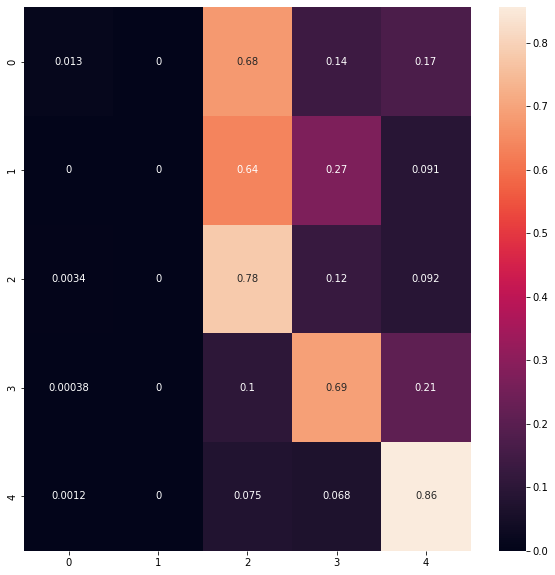

In [19]:
error_modelo(BAG, X_test, y_test)

F1 0.7684921388625092
Precision 0.7684921388625092
Recall 0.7684921388625092
------------------------------


(0.7684921388625092, 0.7684921388625092)

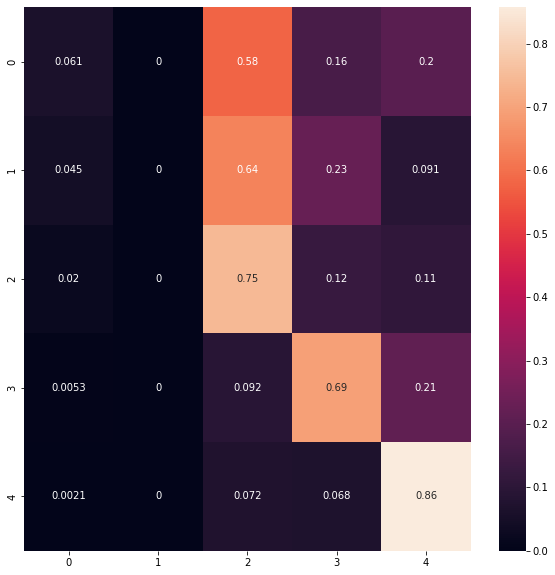

In [21]:
error_modelo(DTC, X_test, y_test)

F1 0.7677535084942493
Precision 0.7677535084942493
Recall 0.7677535084942493
------------------------------


(0.7677535084942493, 0.7677535084942493)

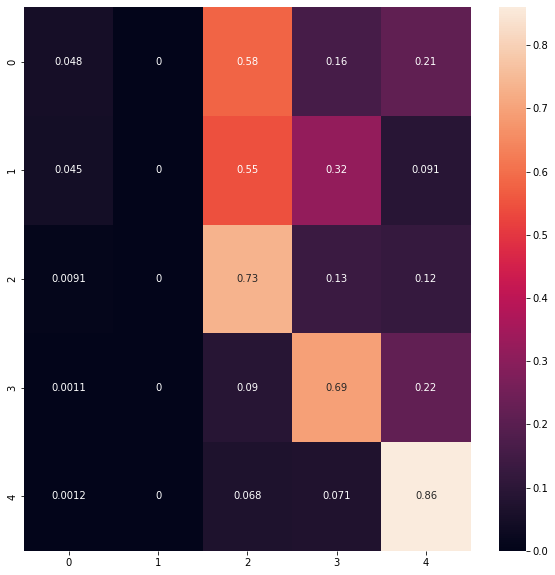

In [22]:
error_modelo(RND, X_test, y_test)

F1 0.7737680700643663
Precision 0.7737680700643663
Recall 0.7737680700643663
------------------------------


(0.7737680700643663, 0.7737680700643663)

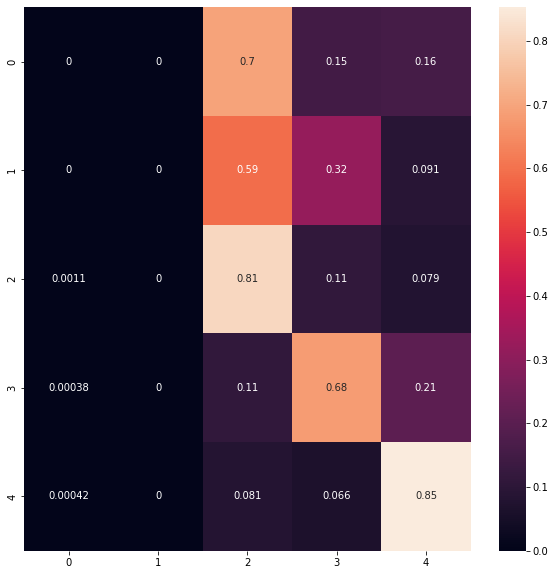

In [23]:
error_modelo(GBCT, X_test, y_test)

c:\Users\jtr_7\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


F1 0.35549224438113325
Precision 0.35549224438113325
Recall 0.35549224438113325
------------------------------


(0.35549224438113325, 0.35549224438113325)

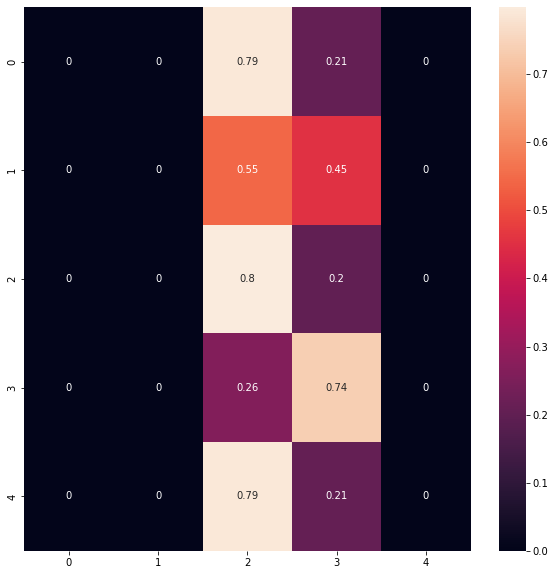

In [24]:
error_modelo(KNN, X_test, y_test)

F1 0.6996939959902923
Precision 0.6996939959902923
Recall 0.6996939959902923
------------------------------


(0.6996939959902923, 0.6996939959902923)

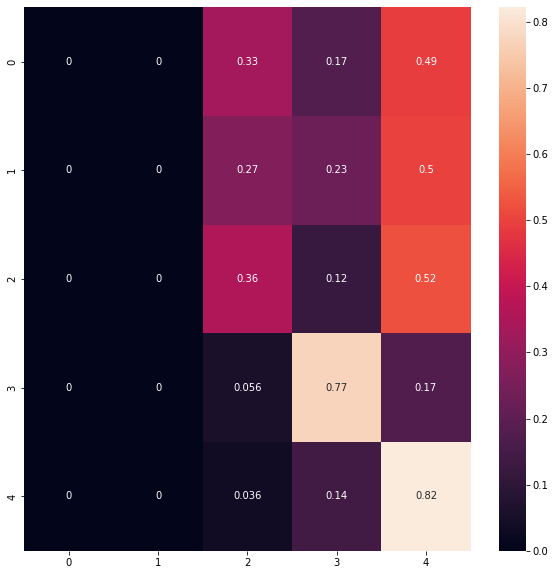

In [25]:
error_modelo(LOGREG, X_test, y_test)

Viendo estos datos desechamos los modelos de *REGRESION LOGÍSTICA* y de *K NEAREST NEIGHBORS*, ya que sus métricas están alejadas del resto.

### 3. LOOKING FOR THE BEST MODEL

**ADA**

In [21]:
os.getcwd()

'E:\\Bootcamp_22\\Javier\\Repositorios\\Machine_Learning\\model'

In [26]:
ADA

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,
                                                         random_state=20),
                   random_state=20)

In [27]:
ada_params = {
    'n_estimators': np.arange(1,200,50),                                # hacerlo o mano y ver si consigo mejores resultados
    'learning_rate': np.arange(0.01,0.1,0.02),
    'algorithm': ['SAMME','SAMME.R']   
}

GS_ADA = GridSearchCV(estimator = ADA,
                  param_grid = ada_params,
#                  n_jobs = -1,              #Cuantos procesadores se utilizan, -1 es el maximo
                  cv = 5,
                  scoring='f1_micro',
#                  error_score='raise'
                    )

GS_ADA.fit(X_train, y_train)
print(GS_ADA.best_estimator_)
print(GS_ADA.best_score_)
print(GS_ADA.best_params_)
pickle.dump(GS_ADA.best_estimator_,open('GS_ADA','wb'))

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=10,
                                                         random_state=20),
                   learning_rate=0.01, n_estimators=51, random_state=20)
0.7709029352285899
{'algorithm': 'SAMME', 'learning_rate': 0.01, 'n_estimators': 51}


Según estos datos habría que realizar un nuevo GS modificando el parámetro *learning_rate* disminuyendo el rango.

F1 0.7728184024480321
Precision 0.7728184024480321
Recall 0.7728184024480321
------------------------------


(0.7728184024480321, 0.7728184024480321)

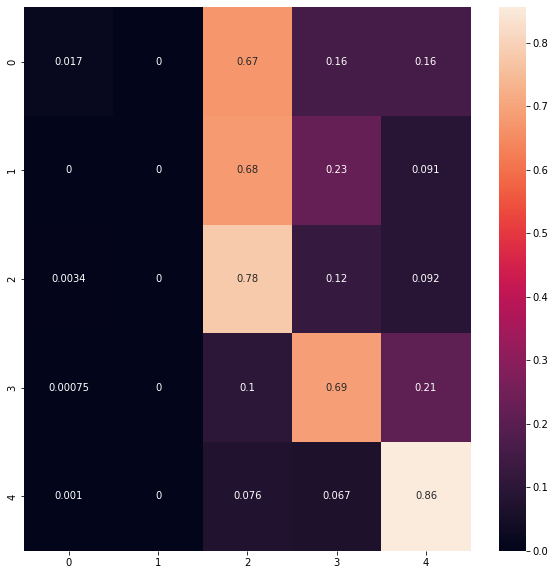

In [28]:
error_modelo(GS_ADA.best_estimator_, X_test, y_test)

**BAG**

In [29]:
bag_params = {
    'bootstrap': [True,False],                              # hacerlo o mano y ver si consigo mejores resultados
    'warm_start': [True,False],
    'max_features': np.arange(3,5,1),
    'max_samples': np.arange(125,175,25),
    'n_estimators': np.arange(125,175,25)
}

GS_BAG = GridSearchCV(estimator = BAG,
                  param_grid = bag_params,
#                  n_jobs = -1,              #Cuantos procesadores se utilizan, -1 es el maximo
                  cv = 5,
                  scoring='f1_micro')

GS_BAG.fit(X_train, y_train)
print(GS_BAG.best_estimator_)
print(GS_BAG.best_score_)
print(GS_BAG.best_params_)
pickle.dump(GS_BAG.best_estimator_,open('GS_BAG','wb'))

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,
                                                        random_state=20),
                  bootstrap=False, max_features=4, max_samples=150,
                  n_estimators=150, random_state=20, warm_start=True)
0.7702344786110773
{'bootstrap': False, 'max_features': 4, 'max_samples': 150, 'n_estimators': 150, 'warm_start': True}


Estos parámetros son válidos como valores de optimización.

Se podría mejorar acotando más aún los mismos.

In [23]:
GS_BAG.best_estimator_

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,
                                                        random_state=20),
                  bootstrap=False, max_features=4, max_samples=151,
                  n_estimators=151, random_state=20, warm_start=True)

F1 0.7671203967500265
Precision 0.7671203967500264
Recall 0.7671203967500264
------------------------------


(0.7671203967500264, 0.7671203967500264)

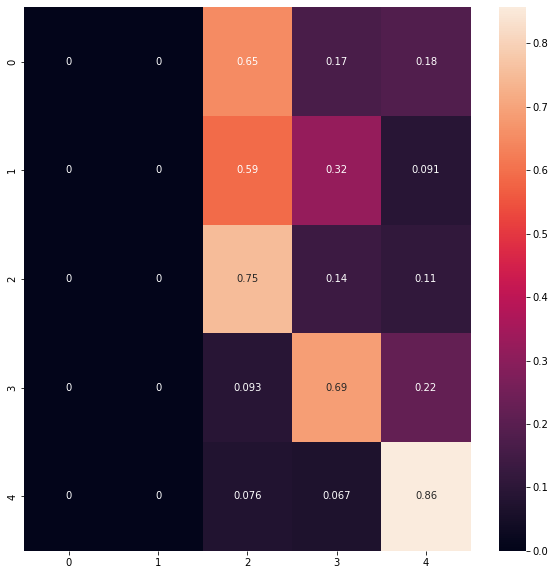

In [30]:
error_modelo(GS_BAG.best_estimator_, X_test, y_test)

**DTC**

In [20]:
DTC_params = {
#    'max_leaf_nodes': np.arange(1,50,5),                    # hacerlo o mano y ver si consigo mejores resultados
    'criterion': ['gini','entropy'],
    'max_depth': np.arange(1,5,1),
    'max_features': np.arange(3,5,1),
    'min_samples_leaf': np.arange(0.05,0.15,0.05),
    'min_samples_split': np.arange(3,7,1)
}

GS_DTC = GridSearchCV(estimator = DTC,
                  param_grid = DTC_params,
#                  n_jobs = -1,              #Cuantos procesadores se utilizan, -1 es el maximo
                  cv = 3,
                  scoring='f1_micro')

GS_DTC.fit(X_train, y_train)
print(GS_DTC.best_estimator_)
print(GS_DTC.best_score_)
print(GS_DTC.best_params_)
pickle.dump(GS_DTC.best_estimator_,open('GS_DTC','wb'))

DecisionTreeClassifier(max_depth=4, max_features=3, max_leaf_nodes=6,
                       min_samples_leaf=0.05, min_samples_split=3,
                       random_state=20)
0.7391747720544576
{'criterion': 'gini', 'max_depth': 4, 'max_features': 3, 'max_leaf_nodes': 6, 'min_samples_leaf': 0.05, 'min_samples_split': 3}


c:\Users\jtr_7\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
384 fits failed out of a total of 3840.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
384 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jtr_7\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jtr_7\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\tree\_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "c:\Users\jtr_7\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\tree\

F1 0.740846259364778
Precision 0.7408462593647779
Recall 0.7408462593647779
------------------------------


(0.7408462593647779, 0.7408462593647779)

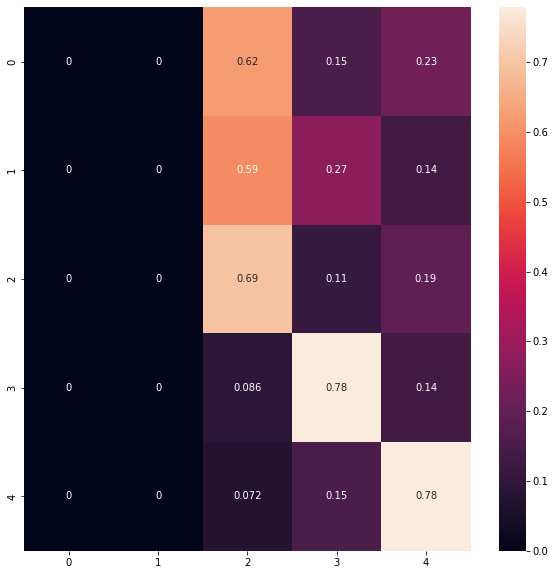

In [32]:
error_modelo(GS_DTC.best_estimator_, X_test, y_test)

**RND**

In [16]:
random_forest_params = {                            # pendiente de volver a realizarlo
    'max_leaf_nodes': [5,6,7],
#    'criterion': ['gini','entropy'],
    'max_depth': [2,3,4],
    'max_features': [3,4,5],
#    'min_samples_leaf': [0.05,0.1,0.15],
#    'bootstrap': [True,False],
#    'warm_start': [True,False],
    'min_samples_split': [2 ,5,15,20]
}

GS_RND = GridSearchCV(estimator = RND,
                  param_grid = random_forest_params,
#                  n_jobs = -1,              #Cuantos procesadores se utilizan, -1 es el maximo
                  cv = 3,
#                  error_score='raise',
                  scoring='f1_micro')

GS_RND.fit(X_train, y_train)
print(GS_RND.best_estimator_)
print(GS_RND.best_score_)
print(GS_RND.best_params_)
pickle.dump(GS_RND.best_estimator_,open('GS_RND','wb'))

RandomForestClassifier(max_depth=3, max_features=3, max_leaf_nodes=6,
                       random_state=20)
0.7566216685486159
{'max_depth': 3, 'max_features': 3, 'max_leaf_nodes': 6, 'min_samples_split': 2}


F1 0.7576237205866836
Precision 0.7576237205866836
Recall 0.7576237205866836
------------------------------


(0.7576237205866836, 0.7576237205866836)

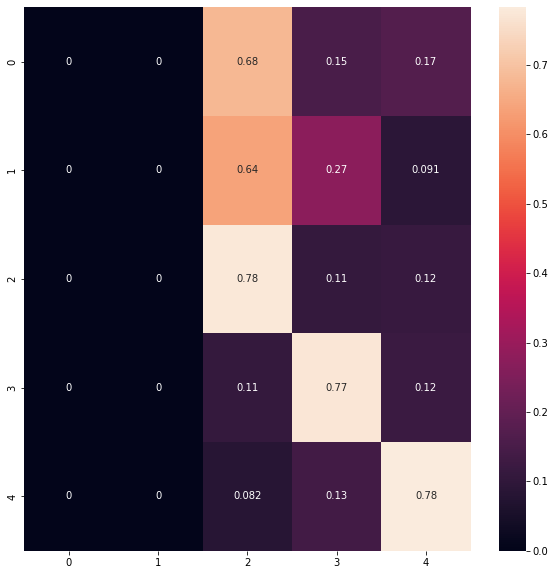

In [17]:
error_modelo(GS_RND.best_estimator_, X_test, y_test)

**GBCT**


QUEDA ESTE MODELO POR MEJORAR

In [24]:
GB_params = {                                                                       # He reducido cantiddad de valores para repetirlo y ver si lo hace 
#    'criterion': ['friedman_mse', 'squared_error', 'mse', 'mae'],
    'max_depth': np.arange(1,11,5),
    'warm_start': [True, False],
    'max_features': np.arange(2,5,2),
    'learning_rate': np.arange(0.05,0.55,0.25),
    'min_samples_split': np.arange(5,30,10),
    'n_estimators': np.arange(100,200,50)
}

GS_GBCT = GridSearchCV(estimator = GBCT,
                  param_grid = GB_params,
#                  n_jobs = -1,              #Cuantos procesadores se utilizan, -1 es el maximo
                  error_score='raise',
                  cv = 3,
                  scoring='f1_micro')

GS_GBCT.fit(X_train, y_train)
print(GS_GBCT.best_estimator_)
print(GS_GBCT.best_score_)
print(GS_GBCT.best_params_)
pickle.dump(GS_GBCT.best_estimator_,open('GS_GBCT','wb'))

GradientBoostingClassifier(learning_rate=0.05, max_depth=6, max_features=2,
                           min_samples_split=25, random_state=20,
                           warm_start=True)
0.7747371094866261
{'learning_rate': 0.05, 'max_depth': 6, 'max_features': 2, 'min_samples_split': 25, 'n_estimators': 100, 'warm_start': True}


F1 0.7726073651999577
Precision 0.7726073651999578
Recall 0.7726073651999578
------------------------------


(0.7726073651999578, 0.7726073651999578)

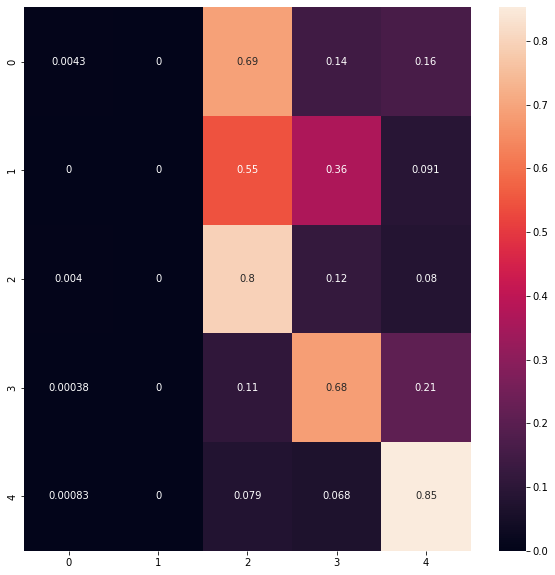

In [25]:
error_modelo(GS_GBCT.best_estimator_, X_test, y_test)

Salvo el modelo **ADA Boost** ninguno de los modelos mejora con un *GridSearch*, es por ello que vamos a hacer un último intento de mejorar los modelos "a mano".